
<h1 style="font-weight:normal" align="center">
  &nbsp;Women in Data - Guatemala Chapter&nbsp;<br>
  Visualización de Datos - Cristóbal Alcázar
</h1>


Última actualización: `13/10/2021`


## Configuraciones generales

Estas celdas se deben ejecutar una vez por sesión y luego se puede ir a las siguientes secciones para correr el código sin problemas.


Descargar fuentes (i.e. archivos con extensión `.ttf`) desde repositorios de Github como el de [GoogleFonts](https://github.com/orgs/googlefonts/repositories):


In [ ]:
!wget -q https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
!wget -q https://github.com/google/fonts/raw/main/ofl/lato/Lato-Bold.ttf
!wget -q https://github.com/FrancesCoronel/nyt-comm/raw/master/fonts/cheltenham/cheltenham-normal-200.ttf
!wget -q https://github.com/mathew-kurian/Sandbox/raw/master/TextJustify/app/src/main/assets/fonts/nyt-cheltenham-bold.ttf

Vamos a utilizar el gestor de fuentes de matplotlib `font_manager` para incorporar las fuentes al directorio y poder contar con ellas:

In [ ]:
#import matplotlib.font_manager y agregar las fuentes descargadas
from matplotlib import font_manager
font_manager.fontManager.addfont('Roboto-Regular.ttf')
font_manager.fontManager.addfont('Lato-Bold.ttf')
font_manager.fontManager.addfont('cheltenham-normal-200.ttf')
font_manager.fontManager.addfont('nyt-cheltenham-bold.ttf')

Es posible verificar si se agregaron correctamente si consultamos las fuentes disponibles:

In [ ]:
# validar que las fuentes estén disponibles
font_manager.fontManager.ttflist[-4:]

[<Font 'Roboto' (Roboto-Regular.ttf) normal normal regular normal>,
 <Font 'Lato' (Lato-Bold.ttf) normal normal 700 normal>,
 <Font 'NYTCheltenham' (cheltenham-normal-200.ttf) normal normal light normal>,
 <Font 'StymieNYT' (nyt-cheltenham-bold.ttf) normal normal 700 normal>]

Cargar los modulos utilizados en el notebook:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker
import seaborn as sns
import pandas as pd
import numpy as npb
import seaborn as sns
import pandas as pd
import numpy as np

## Capítulo 1: Visualizar cantidades

<h1 style="font-weight:normal" align="center">
  <img src="https://clauswilke.com/dataviz/cover.png" alt="Fundamentals of Data Visualization, Claus Wilke" border="0" width="300"></a>
</h1>

Implementación en python 🐍 de varías de las buenas prácticas desarrolladas en el capítulo 6: `Visualizing Amounts` del libro [Fundamentals of Data Visualization (Wilke)](https://clauswilke.com/dataviz/).


¿Qué encontraras en esta sección?🔎
1. Lo esencial de visualizar magnitudes usando gráficos de barra 📊
1. Agregar como axes de un subplot visualizaciones creadas con `seaborn`
1. Utilizar un heatmap para ver la evolución de magnitudes a lo largo del tiempo
1. La importancia del orden en revelar las tendencias


### Descargar los datos

**TL;DR**: En esta sección descargaremos datos desde ell repositorio del Banco Mundial. Puedes ejecutar rápidamente las celdas de código y continuar a la siguiente sección. Sin embargo, si quieres aprender funcionalidades de trabajar en notebooks desde google colab, recomiendo estudiar un poco más detenidamente la sección, para ver un ejemplo de como utilizar comandos de terminal para descargar archivos, descomprimirlos, y poder acceder a ellos luego con `python`.


Lo primero que vamos hacer es descargar los datos desde el repositorio del Banco Mundial, esto se puede realizar a través de comandos directamente desde colab.

Si agregamos el cáracter de escape `!` al principio de la celda de código, podemos utilizar comandos del términal, como `wget` para descargar contenido desde sitios web:

In [ ]:
!wget https://databank.worldbank.org/data/download/WDI_csv.zip

--2021-10-12 20:32:06--  https://databank.worldbank.org/data/download/WDI_csv.zip
Resolving databank.worldbank.org (databank.worldbank.org)... 192.86.102.146
Connecting to databank.worldbank.org (databank.worldbank.org)|192.86.102.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66796164 (64M) [application/x-zip-compressed]
Saving to: ‘WDI_csv.zip’

WDI_csv.zip          30%[=====>              ]  19.47M   896KB/s    in 23s     

2021-10-12 20:32:36 (872 KB/s) - Read error at byte 20414464/66796164 (Connection reset by peer). Retrying.

--2021-10-12 20:32:37--  (try: 2)  https://databank.worldbank.org/data/download/WDI_csv.zip
Connecting to databank.worldbank.org (databank.worldbank.org)|192.86.102.146|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 66796164 (64M), 46381700 (44M) remaining [application/x-zip-compressed]
Saving to: ‘WDI_csv.zip’

WDI_csv.zip         100%[++++++=============>]  63.70M   890KB/s    in 51s 

Una vez descargado, tendremos en el espacio temporal de colab el archivo `WDI_csv.zip`. Puedes verificar si esta el archivo en el menú de la izquierda, ícono de carpeta, directorio `content`. Otra alternativa es usar comandos de terminal como `ls` para ver el contenido del directorio.

In [ ]:
!ls ../content

cheltenham-normal-200.ttf  nyt-cheltenham-bold.ttf  sample_data
Lato-Bold.ttf		   Roboto-Regular.ttf	    WDI_csv.zip


Para acceder al archivo `csv` debemos descomprimir la información, para esto usaremos el comando `unzip`. 

Nota: muchos comandos de terminal se pueden utilizar con el flag `-q` de *quiet* y evitar que se muestre información acerca del progreso de ejecución. Esto tambien lo podríamos haber utilizado con el comando `wget`.

In [ ]:
!unzip -q WDI_csv.zip

Ahora tenemos varios archivos en el mismo directorio:

In [ ]:
!ls

cheltenham-normal-200.ttf  sample_data		  WDIData.csv
Lato-Bold.ttf		   WDICountry.csv	  WDIFootNote.csv
nyt-cheltenham-bold.ttf    WDICountry-Series.csv  WDISeries.csv
Roboto-Regular.ttf	   WDI_csv.zip		  WDISeries-Time.csv


### Preparación de los datos (i.e. data wrangling)

Ya con los archivos descargados se pueden abrir con `pd.read_csv`.

In [ ]:
series=pd.read_csv('../content/WDISeries.csv')

In [ ]:
series.head(n=1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agricul...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


Necesitamos encontrar el código de la serie _"Individuals using the Internet (% of population)"_.


In [ ]:
series[series['Indicator Name'] == 'Individuals using the Internet (% of population)']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
520,IT.NET.USER.ZS,Infrastructure: Communications,Individuals using the Internet (% of population),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,International Telecommunication Union (ITU) Wo...,The Internet is a world-wide public computer n...,The digital and information revolution has cha...,NaN,NaN,NaN,CC BY-4.0,NaN


In [ ]:
list(series[series['Indicator Name'] == 'Individuals using the Internet (% of population)']['Long definition'])

['Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.']

Ahora utilizaremos el código anterior para filtrar la data asociada a esta serie del archivo 'WDIData.csv'.

In [ ]:
internet = pd.read_csv('../content/WDIData.csv')
internet = internet[internet['Indicator Code'] == 'IT.NET.USER.ZS']
#internet = internet[internet['Indicator Code'] == 'IT.NET.BBND.P2']

In [ ]:
internet.head(n=2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
616,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001599,0.004664,0.013609,0.029658,0.081216,0.106349,0.202056,0.367790,0.544146,0.743922,0.930780,1.106896,1.408190,1.716791,1.835345,2.136141,2.977944,2.720112,3.272466,6.441728,7.904114,8.940634,10.552158,13.052010,15.990277,17.165587,20.332119,23.657366,26.448284,NaN,NaN
2059,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000004,0.000129,0.007035,0.019842,0.035424,0.086239,0.138961,0.209596,0.411061,0.657285,1.177865,2.326741,3.463236,4.240174,4.991565,5.807961,7.242072,8.663310,10.335555,12.901207,15.470625,19.421850,21.369414,24.676247,29.741679,32.418191,NaN,NaN


Es importante notar que en las filas contienen tanto países como regiones y macrozonas.

In [ ]:
internet['Country Name'].unique()[:9]

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)'], dtype=object)

Podemos explorar otra tabla con información acerca de los
países y ver si la podemos utilizar para identificar los países:

In [ ]:
paises=pd.read_csv('../content/WDICountry.csv')

In [ ]:
paises.head(n=1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN


In [ ]:
paises['Region'].unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

Investiguemos si las observaciones que tienen valores `NA` en la columna 'Region' son categorías que agrupan países.

In [ ]:
paises[paises['Region'].isna()]['Short Name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'OECD members', 'Other sm

Esto parece funcionar, si negamos la condición lógica (notar '~') deberíamos tener solo páises.

In [ ]:
paises[~paises['Region'].isna()]['Short Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia',
       'Gabon', 'United Kingdom'

Guardaremos los 'Country Code' de la tabla `paises`, pero luego de aplicar el filtro anterior, y así descartar las observaciones que no son países.

In [ ]:
filtrar_paises = paises[~paises['Region'].isna()]['Country Code']

In [ ]:
internet_por_pais = internet[internet['Country Code'].isin(filtrar_paises)]

Descartar columnas constantes que no se utilizaran.

In [ ]:
select_col = internet_por_pais.columns.tolist()
select_col.remove('Indicator Name')
select_col.remove('Indicator Code')

In [ ]:
internet_por_pais = internet_por_pais[select_col]

Transformar la tabla de formato ancho a largo; las columnas que tienen información de los años serán stackeadas una sobre otra.

In [ ]:
internet_por_pais= pd.melt(internet_por_pais, id_vars=['Country Name', 'Country Code'], 
                           var_name='year',
                           value_name='value')

Elimamos las filas que tienen valores NA en el la variable de medición (% de acceso a internet).

In [ ]:
internet_por_pais = internet_por_pais[~internet_por_pais.value.isna()]

Terminamos por homogenizar el estilo en que están escritos los nombres.

In [ ]:
internet_por_pais.rename(columns = {'Country Code':'country_code', 
                                    'Country Name': 'country_name'},
                         inplace=True)

In [ ]:
internet_por_pais

,country_name,country_code,year,value
25,Botswana,BWA,1960,0.000000
31,Burundi,BDI,1960,0.000000
78,Grenada,GRD,1960,0.000000
121,Maldives,MDV,1960,0.000000
189,Syrian Arab Republic,SYR,1960,0.000000
...,...,...,...,...
13212,Thailand,THA,2020,77.843748
13218,Turkey,TUR,2020,77.669560
13224,United Arab Emirates,ARE,2020,100.000000
13225,United Kingdom,GBR,2020,94.818201


Finalmente, debemos cambiar los tipos de variables de los
datos, dado que los años eran nombres de columnas, y por consiguiente texto, perdemos la opción de filtrar por año la información.

In [ ]:
internet_por_pais.dtypes

country_name     object
country_code     object
year             object
value           float64
dtype: object

In [ ]:
internet_por_pais = internet_por_pais.astype({'year': int})

In [ ]:
internet_por_pais.dtypes

country_name     object
country_code     object
year              int64
value           float64
dtype: object

### Lo esencial del barplot 

Seleccionaremos un grupo de países para visualizar.

In [ ]:
selected_countries = ['Iceland', 'Norway', 'United Kingdom', 'Japan', 'Canada', 
                    'Germany', 'New Zealand', 'France', 'Israel', 'United States',
                    'Argentina', 'Chile', 'Italy', 'Brazil', 'Guatemala', 
                    'South Africa', 'China', 'Algeria', 'India', 'Kenya']

In [ ]:
internet2016 = internet_por_pais[(internet_por_pais.year == 2016) & \
                    internet_por_pais.country_name.isin(selected_countries)]
internet2016.head(n=2)

,country_name,country_code,year,value
12154,Algeria,DZA,2016,42.945527
12159,Argentina,ARG,2016,70.968981


Cuando hay varias categorias y los nombres de las etiquetas son largos, es común que se sobrepongan. Esto dificulta la lectura del gráfico, existen soluciones como rotar las etiquetas del eje, pero esto muchas veces es incomodo. 

Una mejor alternativa es invertir los ejes y dejar la variable
categorica en el eje vertical.

Text(0.1, 0.046, 'Internet adoption in 2016 for select countries.\nData source: World Bank')

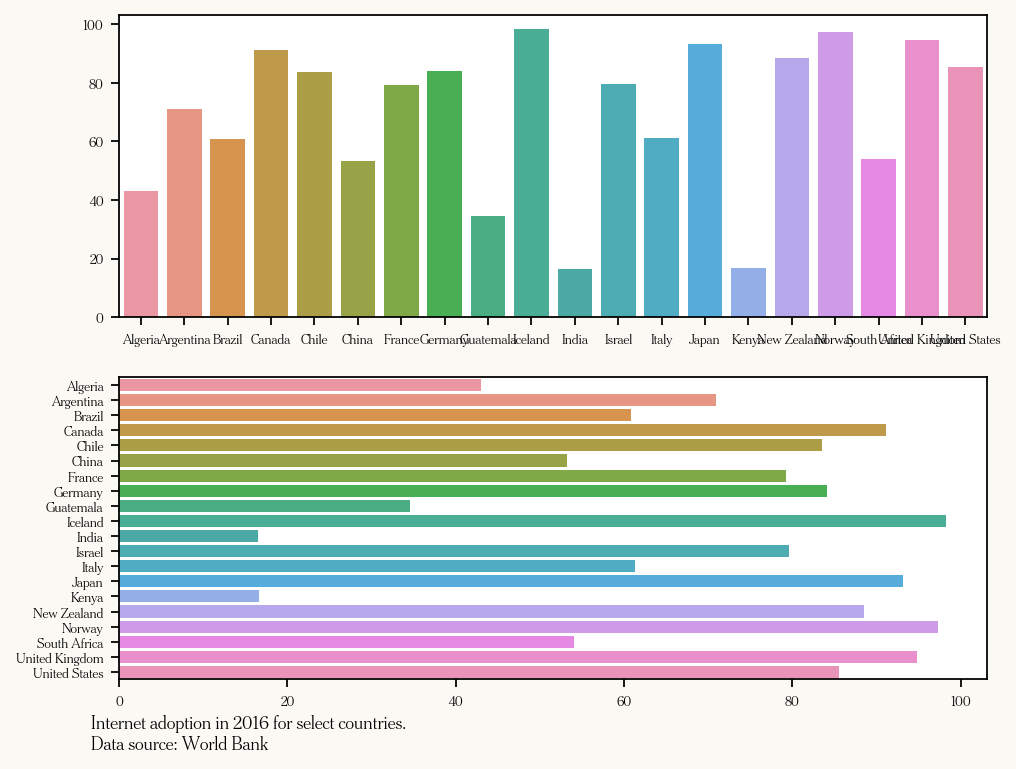

In [ ]:
# actualizar parametros de matplotlib (mpl)
mpl.rcParams.update({'font.weight':'light',
                     'font.size' : 12,
                     'font.family': 'NYTCheltenham',
                     'figure.facecolor' : '#fbf9f4',
                     # controlar aspectos de los axes
                     'axes.facecolor' : 'white',
                     'axes.grid' : False,
                     # tamaño letra de las etiquetas
                     'xtick.labelsize': 6,
                     'ytick.labelsize': 6,
                     'figure.dpi' : 160})

fig, ax = plt.subplots(2, 1, figsize=(7, 5.5))

sns.barplot(x='country_name',
            y='value',
            data=internet2016,
            ax=ax[0],
            ci=False)


sns.barplot(y='country_name',
            x='value',
            data=internet2016,
            ax=ax[1],
            ci=False)

ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

fig.text(0.10, .046, 
         'Internet adoption in 2016 for select countries.\nData source: World Bank',
         ha='left',
         size=8)

# Por defecto, savefig sobreescribe el parametro figure.facecolor
# Se debe ser explicito en fig.savefig()
#fig.savefig('barplot_internet_horizontal_vs_vertical.png',\
#            facecolor=fig.get_facecolor(),\
#            dpi=320, bbox_inches='tight')

Otro punto importante es el orden en que se grafican las 
categorias. En general, los paquetes de visualización se limitan
a desplegar las categorias por orden alfabetico. 

Una manera de mejorar la lectura del gráfico es ordenar las categorias
en base a las magnitudes que se esta visualizando. El orden, ya sea ascendente o descendente, ayuda a remover la carga cognitiva de considerar el signo de las diferencias relativas entre las categorias y solo enfocarse en las diferencias de niveles.


Text(0.1, 0.046, 'Internet adoption in 2016 for select countries.\nData source: World Bank')

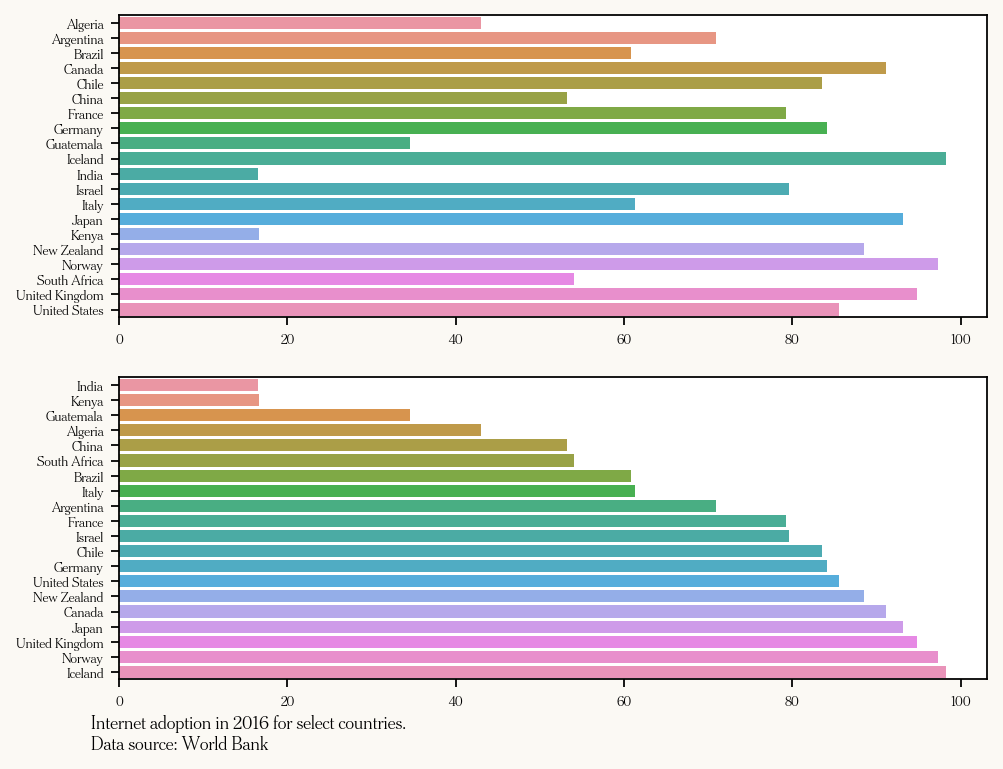

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5.5))
  
sns.barplot(y='country_name',
            x='value',
            data=internet2016,
            ax=ax[0],
            ci=False)

sns.barplot(y='country_name',
            x='value',
            data=internet2016.sort_values(by='value', ascending=True),
            ax=ax[1],
            ci=False)

ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

fig.text(0.10, .046, 
         'Internet adoption in 2016 for select countries.\nData source: World Bank',
         ha='left',
         size=8)

# Por defecto, savefig sobreescribe el parametro figure.facecolor
# Se debe ser explicito en fig.savefig()
#fig.savefig('barplot_ascending.png',\
#            facecolor=fig.get_facecolor(),\
#            dpi=320, bbox_inches='tight')

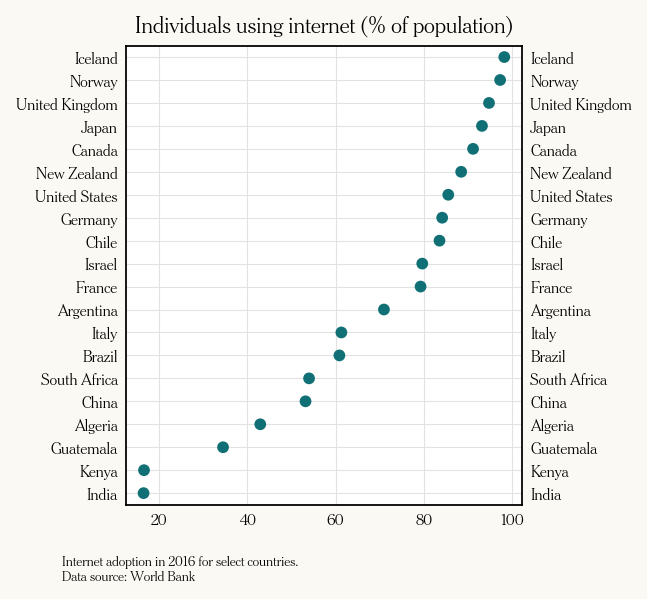

In [ ]:
# actualizar parametros de matplotlib (mpl)
mpl.rcParams.update({'font.weight':'light',
                     'font.size' : 4,
                     'font.family': 'NYTCheltenham',
                     'figure.facecolor' : '#fbf9f4',
                     # controlar aspectos de los axes
                     'axes.facecolor' : 'white',
                     'axes.titlesize' : 10,
                     'axes.grid' : True,
                     'axes.axisbelow': True, # grid atras del gráfico
                     # tamaño letra de las etiquetas
                     'xtick.labelsize': 7,
                     'ytick.labelsize': 7,
                     'figure.dpi' : 160})

fig, ax = plt.subplots(figsize=(3.2, 3.8))

sns.pointplot(y='country_name',
            x='value',
            color='#107075',
            scale=.6,
            join=False,
            data=internet2016.sort_values(by='value', ascending=False))

plt.tick_params(axis='both', 
                length=0,
                left=True,
                right=True,
                labelleft=True, 
                labelright=True,
                grid_color='#e2e2e2',
                grid_linewidth=.5)

# [grid] habilitar gridlines eje y
ax.grid(axis='y')

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Individuals using internet (% of population)')

fig.text(0.0, .001, 
         'Internet adoption in 2016 for select countries.\nData source: World Bank',
         ha='left',
         size=6)

# guardar la visualizacion
plt.savefig('dotplot_internet_2016.png', dpi=320,
            bbox_inches='tight',
            facecolor=fig.get_facecolor())

### Heatmap para la evolución de cantidades a través del tiempo  

Construiremos un mapa de calor para visualizar las series entre los años 1994 y 2016, para un grupo de países.

In [ ]:
selected_countries = ['Iceland', 'Norway', 'United Kingdom', 'Japan', 'Canada', 
                    'Germany', 'New Zealand', 'France', 'Israel', 'United States',
                    'Argentina', 'Chile', 'Italy', 'Brazil', 'Guatemala', 
                    'South Africa', 'China', 'Algeria', 'India', 'Kenya']

In [ ]:
internet_heatmap=\
  internet_por_pais[(internet_por_pais.year >= 1994) & (internet_por_pais.year <= 2016)
                    & internet_por_pais.country_name.isin(selected_countries)].\
  pivot('country_name', 'year', 'value').\
  dropna(how='any')

In [ ]:
internet_heatmap.index

Index(['Algeria', 'Argentina', 'Brazil', 'Canada', 'Chile', 'China', 'France',
       'Germany', 'Guatemala', 'Iceland', 'India', 'Israel', 'Italy', 'Japan',
       'Kenya', 'New Zealand', 'Norway', 'South Africa', 'United Kingdom',
       'United States'],
      dtype='object', name='country_name')

Ordenar de mayor a menor por el % de adopción del año 2016.

In [ ]:
internet_heatmap = internet_heatmap.reindex(internet_heatmap.sort_values(by=2016, ascending=False).index)

Text(0.1, 0.046, 'Figure 6.14: Internet adoption over time, for select countries. Color represents the percent of internet users for the respective\ncountry and year. Countries were ordered by percent internet users in 2016. Data source: World Bank')

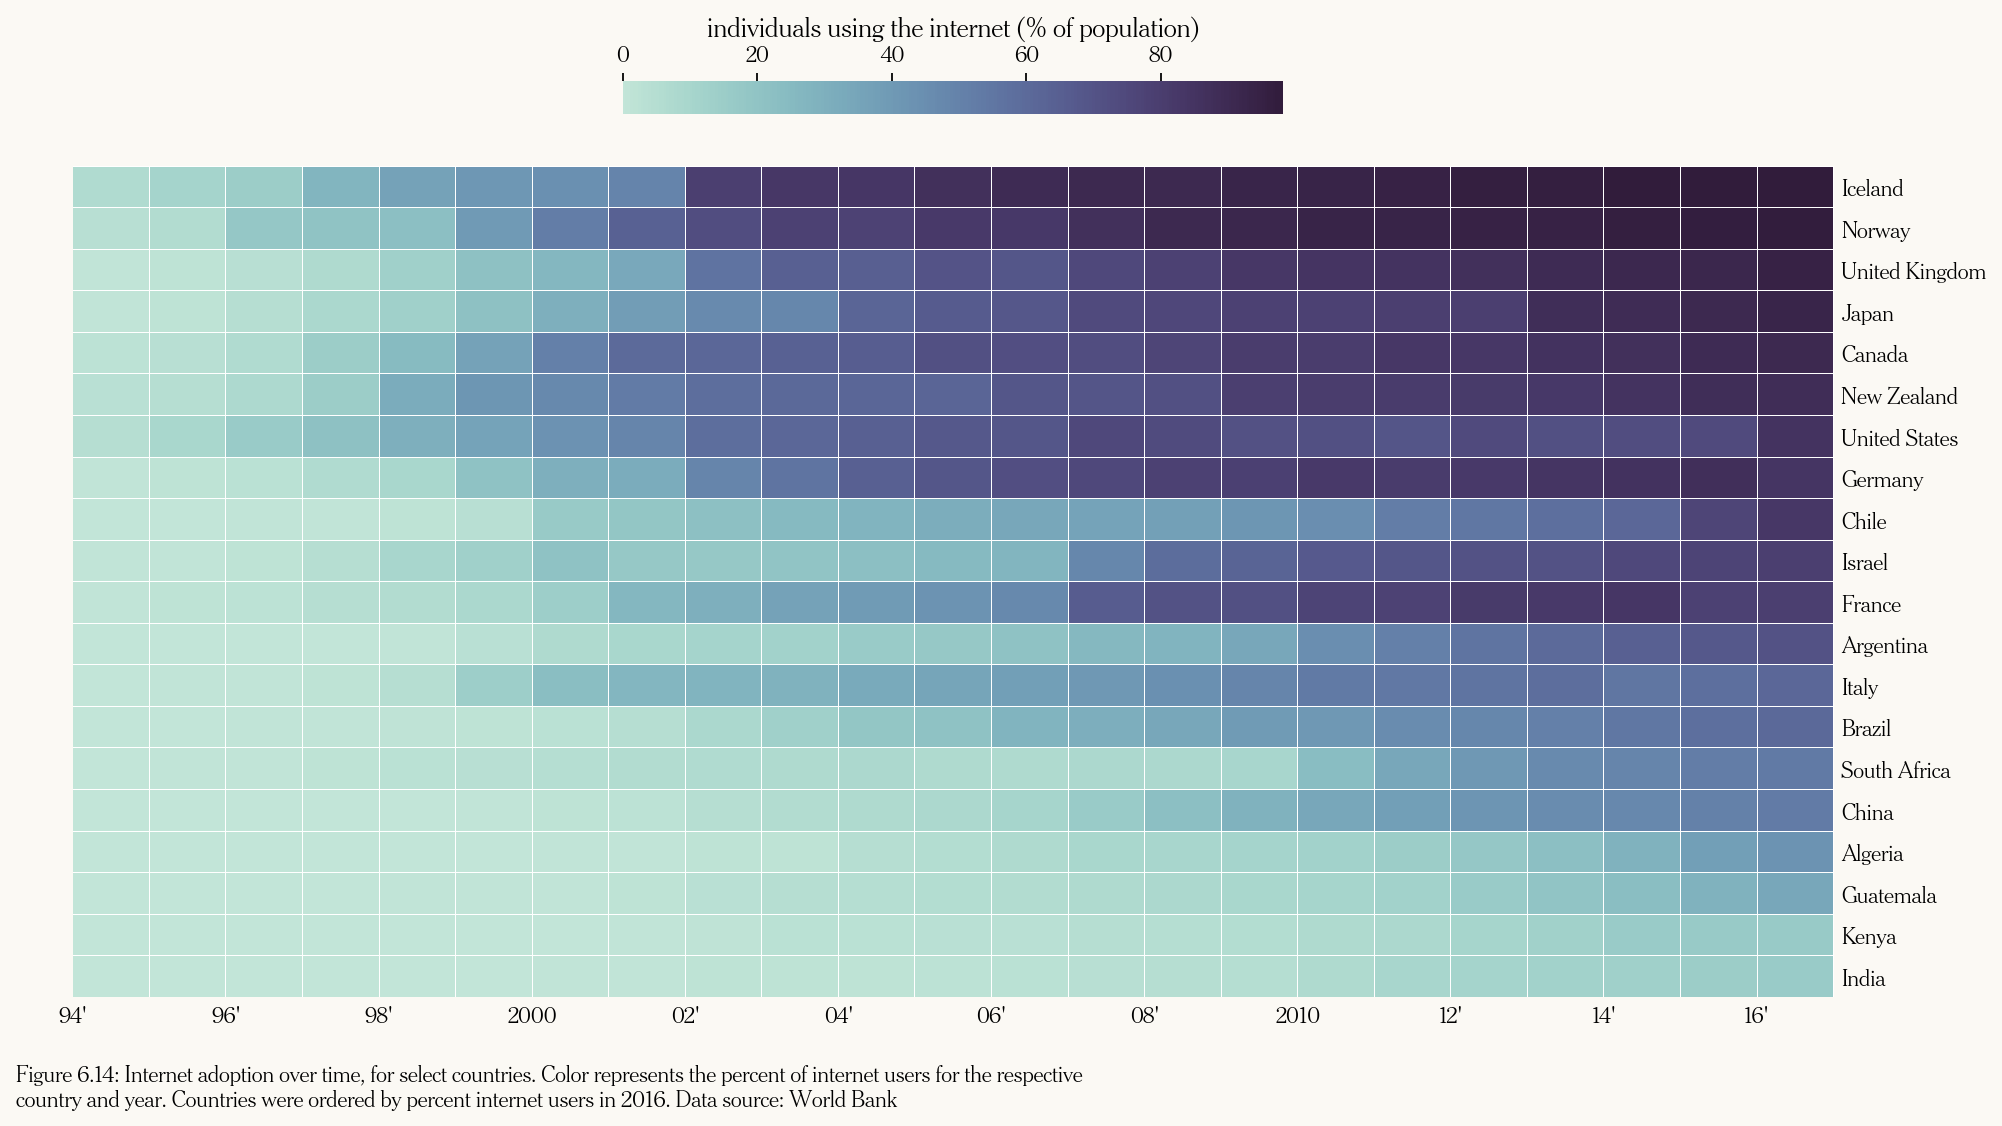

In [ ]:
# actualizar parametros de matplotlib (mpl)
mpl.rcParams.update({'font.weight':'light',
                     'font.size' : 4,
                     'font.family': 'NYTCheltenham',
                     'figure.facecolor' : '#fbf9f4',
                     # controlar aspectos de los axes
                     'axes.facecolor' : 'white',
                     'axes.labelsize' : 12,
                     'axes.titlesize' : 8,
                     'axes.grid' : True,
                     'axes.grid.which' : 'major',
                     # tamaño letra de las etiquetas
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 10,
                     'figure.dpi' : 160})


fig, ax = plt.subplots(figsize=(14.2, 8.6))

# shrink: parametro para compactar el tamaño del colorbar
sns.heatmap(internet_heatmap,
            linewidths=.01,
            # Otros cmap: https://seaborn.pydata.org/tutorial/color_palettes.html
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            cbar_kws={
                      'label':'individuals using the internet (% of population)',
                      'shrink': .375,
                      # importante cambiar los dos parametros en conjunto
                      'use_gridspec': False,
                      'location':'top'
                      })

# 'apagar' el eje vertical izquierdo y 'encender' el derecho
# argumento labelrotation=0 etiquetas de manera horizontal 
ax.tick_params(axis='both', 
                length=0,
                left=False,
                right=True,
                labelleft=False, 
                labelright=True,
                labelrotation=0)

# dado que los años son números enteros y no están como fechas
# una alternativa es fijar intervalos fijos de 2 (1994 - 1996 - ... - 2016)
ax.xaxis.set_major_locator(plt.MultipleLocator(base=2))

# Crear una función en basae a los tick creados anteriormente
def format_func(value, tick_number): 
  year = 1994 + value
  if year == 2000:
    return '2000'
  if year == 2010:
    return '2010'
  else:
    return str(1994+(tick_number-1)*2)[-2:] + "'"

# usar plt.FuncFoormatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# eliminar títulos de los ejes x e y
ax.set_xlabel(None)
ax.set_ylabel(None)

# Agregar texto descriptivo en la parte inferior del gráa
fig.text(0.10, .046, 
         'Figure 6.14: Internet adoption over time, for select countries. Color represents the percent of internet users for the respective\ncountry and year. Countries were ordered by percent internet users in 2016. Data source: World Bank',
         ha='left',
         size=10)

#fig.savefig('internet_adoption_heatmap_2016.png', dpi=320, bbox_inches='tight')

Usando la misma información anterior ordenaremos las series de países por el año en que alcanzaron 20% o más.

Contaremos cuantos años estuvieron con menos del 20% y ordenaremos los países según ese ranking. Importatnte, debemos mantener misma selección de países y horizonte de tiempo para no generar descuadres.

In [ ]:
early_adopters = internet_por_pais[(internet_por_pais.year >= 1994) & (internet_por_pais.year <= 2016)
                    & internet_por_pais.country_name.isin(selected_countries)].\
                    groupby(['country_name']).apply(lambda x: x.value > 20).\
                    groupby(level=0).apply(lambda x: sum(x == False)).\
                    sort_values().index.tolist()

In [ ]:
early_adopters

['Iceland',
 'Norway',
 'United States',
 'Canada',
 'New Zealand',
 'Germany',
 'Japan',
 'United Kingdom',
 'Italy',
 'France',
 'Chile',
 'Israel',
 'Brazil',
 'Argentina',
 'China',
 'South Africa',
 'Algeria',
 'Guatemala',
 'India',
 'Kenya']

Crearemos una variable categorica ordinal para establecer
el orden encontrado en la operación de arriba.

In [ ]:
internet_early_adopters = internet_por_pais[(internet_por_pais.year >= 1994) & 
                                            (internet_por_pais.year <= 2016) & 
                                            internet_por_pais.country_name.isin(selected_countries)].copy()


internet_early_adopters['early_adopters'] = pd.Categorical(
    internet_early_adopters['country_name'],
    categories = early_adopters,
    ordered = True
)

In [ ]:
internet_early_adopters = internet_early_adopters.sort_values('early_adopters').\
  pivot('early_adopters', 'year', 'value').\
  dropna(how='any')

Text(0.1, 0.046, 'Figure 6.15: Internet adoption over time, for select countries. Countries were ordered by the year in which their internet usage first exceeded 20%.\nData source: World Bank')

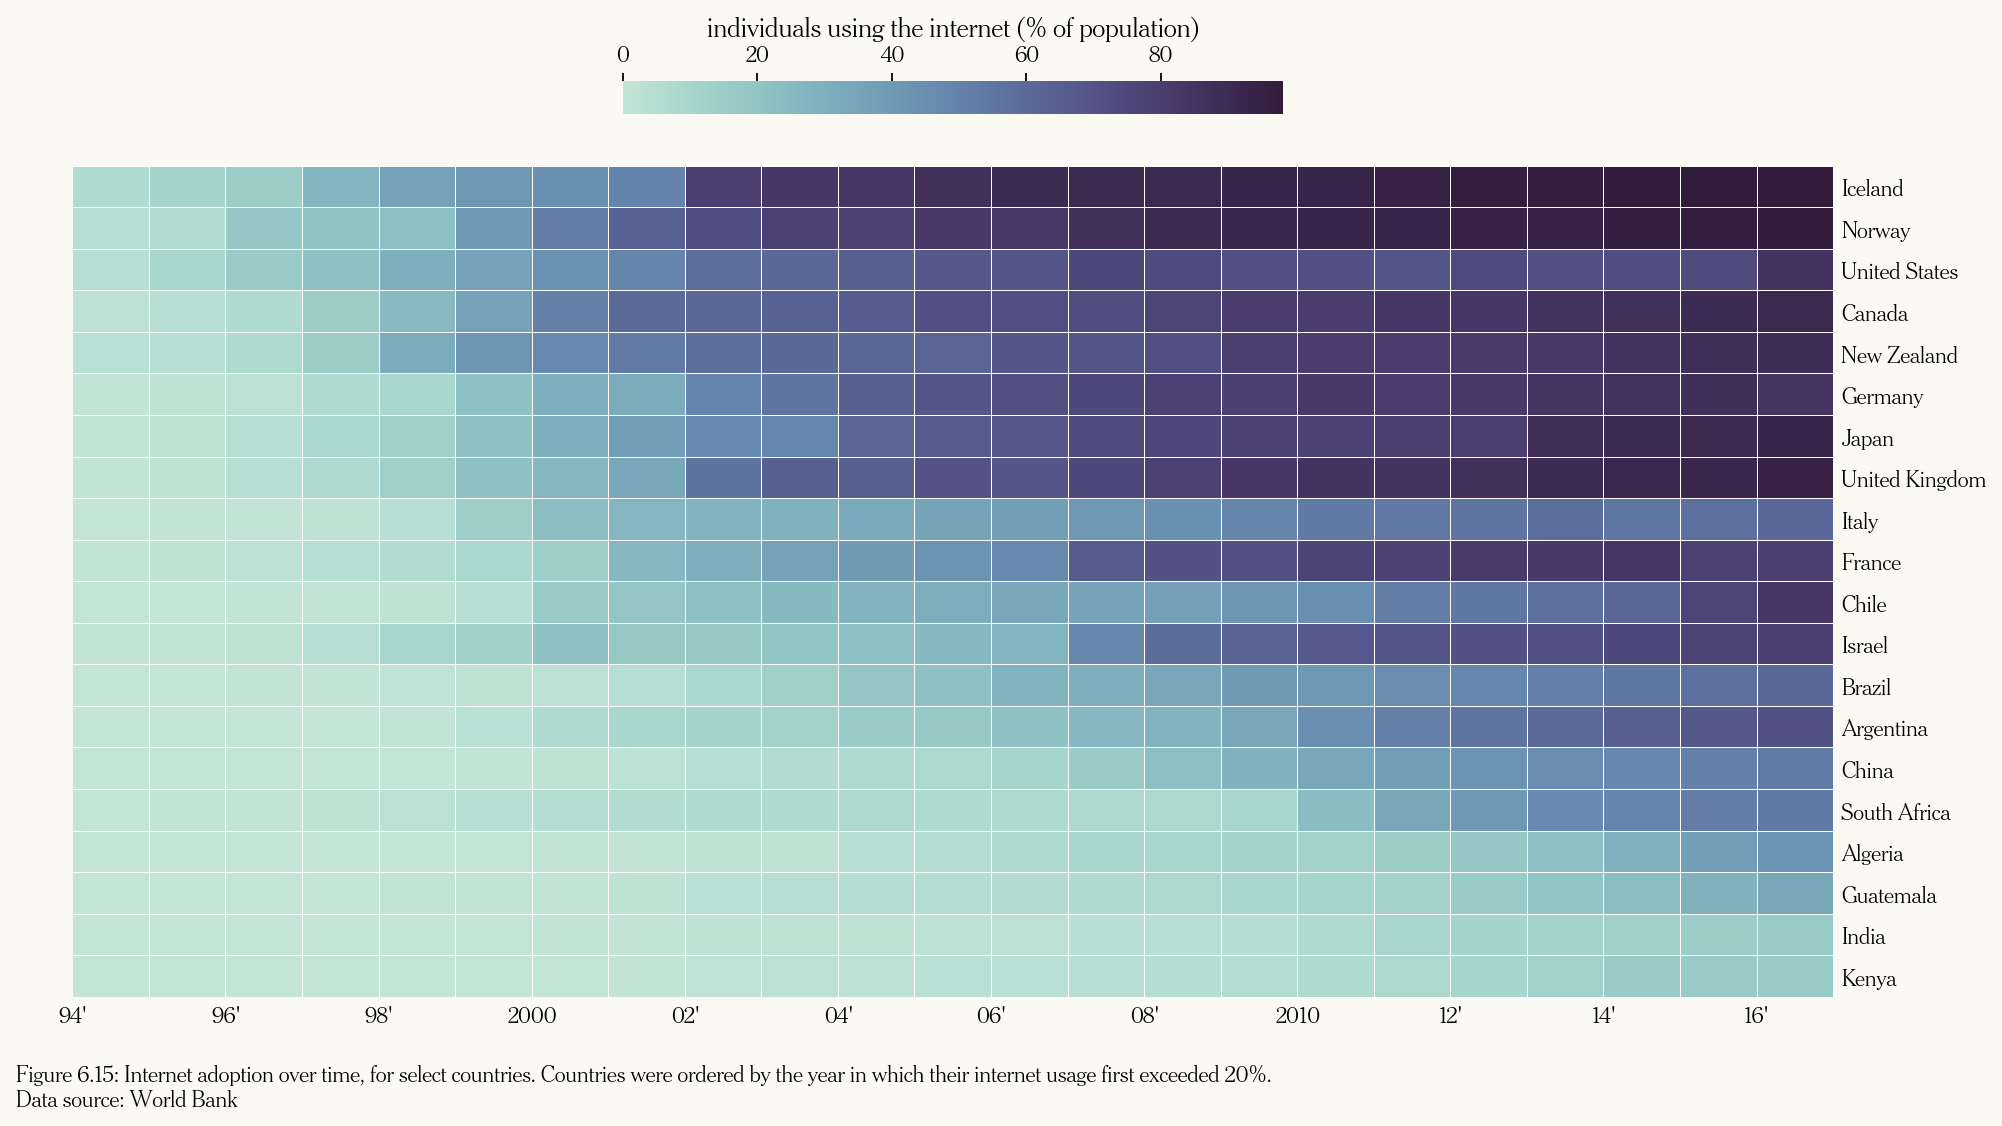

In [ ]:
fig, ax = plt.subplots(figsize=(14.2, 8.6))

# shrink: parametro para compactar el tamaño del colorbar
sns.heatmap(internet_early_adopters,
            linewidths=.01,
            # Otros cmap: https://seaborn.pydata.org/tutorial/color_palettes.html
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            cbar_kws={
                      'label':'individuals using the internet (% of population)',
                      'shrink': .375,
                      # importante cambiar los dos parametros en conjunto
                      'use_gridspec': False,
                      'location':'top'
                      })


# 'apagar' el eje vertical izquierdo y 'encender' el derecho
# argumento labelrotation=0 etiquetas de manera horizontal 
ax.tick_params(axis='both', 
                length=0,
                left=False,
                right=True,
                labelleft=False, 
                labelright=True,
                labelrotation=0,
                )

# dado que los años son números enteros y no están como fechas
# una alternativa es fijar intervalos fijos de 5 (1990 - 1995 - ... - 2015)
loc = plticker.MultipleLocator(base=2)
ax.xaxis.set_major_locator(loc)

# usar plt.FuncFormatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# eliminar títulos de los ejes x e y
ax.set_xlabel(None)
ax.set_ylabel(None)

# Agregar texto descriptivo en la parte inferior del gráa
fig.text(0.10, .046, 
         'Figure 6.15: Internet adoption over time, for select countries. Countries were ordered by the year in which their internet usage first exceeded 20%.\nData source: World Bank',
         ha='left',
         size=10)

#fig.savefig('internet_adoption_heatmap_early.png', dpi=320, bbox_inches='tight')

## Capítulo 2: Palmer Penguins 


<h1 style="font-weight:normal" align="center">
  <img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" alt="Palmer Penguins by @allison_horst" border="0" width="300"></a>
</h1>

Utilizaremos el dataset [Palmer Penguins](https://github.com/allisonhorst/palmerpenguins) disponible en el repositorio por @allison_horst.

¿Qué encontraras en esta sección?🔎
1. Crear una visualización componiendo por capas usando `seaborn`
1. Modificar sus elementos visuales con `matplotlib` 
1. Detalles de edición en matplotlib como ✍️:
 - Agregar anotaciones para explicar y entregar mayor contexto de los elementos 
 en la visualización
 - Agregar una imagen a la visualización

Descargamos los datos desde el repositorio de github.

In [ ]:
palmer_penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

In [ ]:
palmer_penguins.head(n=2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


Explicación visual de algunas variables.

<h1 style="font-weight:normal" align="center">
  <img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" alt="Palmer Penguins by @allison_horst" border="0" width="350"></a>
</h1>

De hecho, vamos a guardar la imagen anterior en la variable `img` utilizando
la función `imread(link_de_la_imagen)`.

In [ ]:
import matplotlib.image as mplimg
img = mplimg.imread('https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png')

Esto lo vamos a utilizar después.

In [ ]:
# actualizar parametros de matplotlib (mpl)
mpl.rcParams.update({'font.weight':'light',
                     'font.size' : 10,
                     'font.family': 'NYTCheltenham',
                     'figure.facecolor' : 'white',
                     'axes.facecolor' : 'white',
                     'axes.labelsize' : 6,
                     'axes.titlesize' : 2,
                     # tamaño letra de las etiquetas
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8,
                     'figure.dpi' : 160})

(-0.5, 3886.5, 2501.5, -0.5)

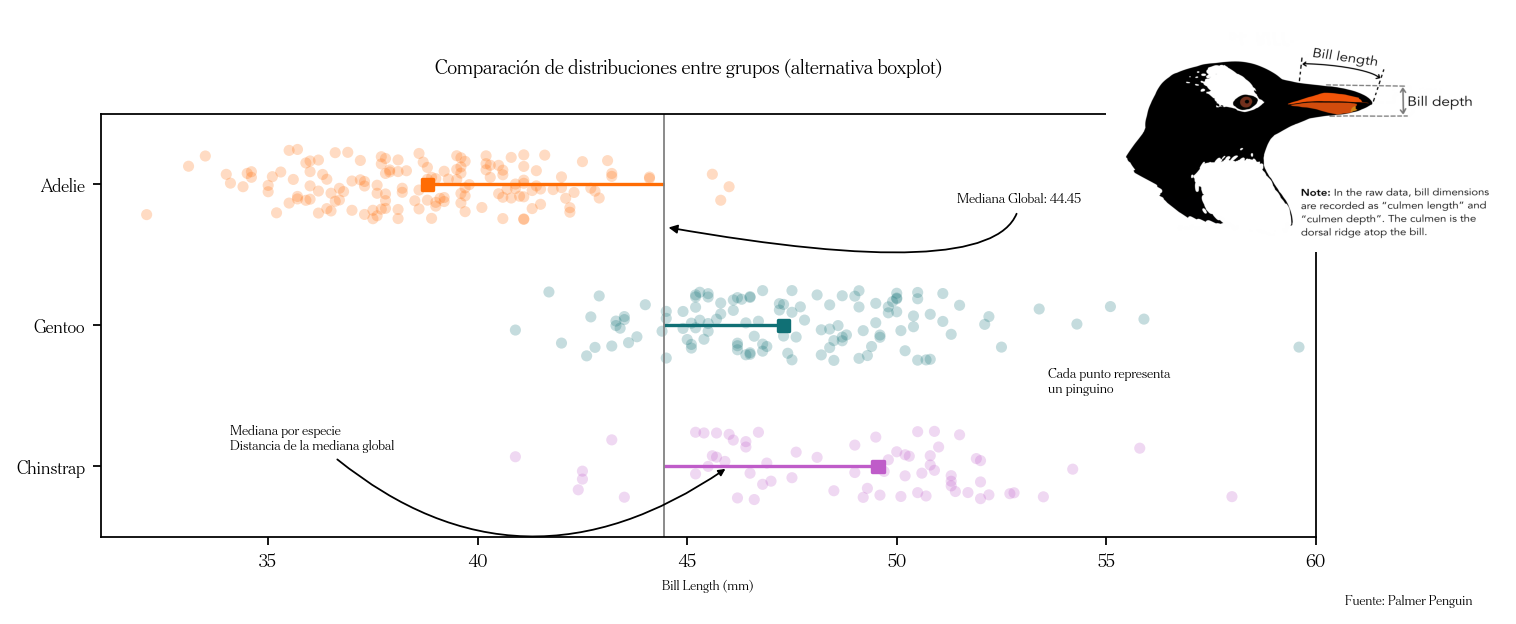

In [ ]:
np.random.seed(123)

# Computar mediana global y grupal
GLOBAL_AVG = palmer_penguins['bill_length_mm'].median()
AVG_PER_SPECIES = palmer_penguins[['species', 'bill_length_mm']].\
  groupby('species').\
  aggregate(np.median)['bill_length_mm'].\
  sort_values()

ANNOTATION_TEXT_SIZE = 6.2

fig, ax = plt.subplots(figsize=(9.8, 3.5))

custom_palette = ['#ff6c04', '#107075', '#bf5cc9']


# Agregar línea vertical con el promedio global
plt.axvline(x=GLOBAL_AVG, 
          linewidth=.8,
          color='gray')

# Agregar líneas distancia mediana-grupal a mediana-global
ax.hlines(y = palmer_penguins['species'].unique(),
          xmin=AVG_PER_SPECIES,
          xmax=GLOBAL_AVG,
          color=custom_palette)

# Crear strip-plot
sns.stripplot(
    x='bill_length_mm', 
    y='species',
    jitter=0.25,
    alpha=0.24,
    size=5,
    zorder=1,
    palette=custom_palette,
    data=palmer_penguins)


plt.xlim(31, 60)

# Agregar punto con la "mediana" por especie
# zorder parameter: https://matplotlib.org/stable/gallery/misc/zorder_demo.html
sns.pointplot(
    x='bill_length_mm',
    y='species',
    estimator=np.median, # estimador para agregar los datos
    ci=None,  # desactivar intervalos de confianza
    join=False,  # no unir los puntos 
    scale=0.75, # tamaño del marcador
    alpha=0,
    markers='s',
    palette=custom_palette,
    zorder=2, 
    data=palmer_penguins
)


# anotación para indicar el promedio global representado por la 
# línea vertical
ax.annotate(f'Mediana Global: {GLOBAL_AVG}', 
            xy=(GLOBAL_AVG, 0.3),
            size=ANNOTATION_TEXT_SIZE,
            xytext=(GLOBAL_AVG + 7, 0.1),
            verticalalignment="center",
            arrowprops=dict(
                            arrowstyle='-|>',
                            connectionstyle="angle3, angleA=90, angleB=-10",
                            mutation_scale=8,
                            lw=0.8,
                            facecolor='black'))


# indicador de medianas por especie de pinguino
ax.annotate('Mediana por especie\nDistancia de la mediana global',
            xy=(46, 2.0), 
            xytext=(palmer_penguins['bill_length_mm'].min() + 2, 1.8),
            size=ANNOTATION_TEXT_SIZE,
            verticalalignment='center',
            arrowprops=dict(
                arrowstyle='-|>',
                connectionstyle='arc3, rad=0.4',
                lw=0.8,
                facecolor='black')
)

# Nota: a pesar de ser un eje y "discreto", podemos interpolar entre-categorias
# fijarse en el componente y del argumento xy=(..., 1.4). '1.4' significa entre 
# entre la especie 'Gentoo' y 'Chinstrap'
ax.annotate("Cada punto representa\nun pinguino",
            xy=(palmer_penguins['bill_length_mm'].max() - 6, 1.4),
            xytext=(palmer_penguins['bill_length_mm'].max() - 6, 1.4),
            size=ANNOTATION_TEXT_SIZE,
            verticalalignment='center'
)


plt.suptitle('Comparación de distribuciones entre grupos (alternativa boxplot)',
             ha='center',
             size = 9)

# agregar un caption
fig.text(1.0, .005, "Fuente: Palmer Penguin", 
         ha='right',
         size=6, style='italic')

# eliminar títulos del eje y 
plt.xlabel('Bill Length (mm)')
plt.ylabel(None)

# ------------------------------------------------------------------
# BONUS: agregar una imagen creando un nuevo eje y especificar
# las coordenadas en términos de la data (transform=ax.transData)
axin = ax.inset_axes([55, -5, 9.4, 9.4],transform=ax.transData)    
axin.imshow(img)
axin.axis('off') # apagar los ejes de la imagen
# ------------------------------------------------------------------

# guardar visualizacion con resolución retina (dpi=320)
#plt.savefig('palmer_penguin_alternativa_boxplot.png', dpi=320,
#            bbox_inches='tight')


## Capítulo 3: U.S. Drought 

![](https://static01.nyt.com/newsgraphics/2021/06/04/western-drought/9aad9a9d25b9810344e012a1ec88c583c93be99b/droughtMonitorChart-Artboard-xxl.png)

El artículo [How Severe Is the Western Drought? See For Yourself (NYC)](https://www.nytimes.com/interactive/2021/06/11/climate/california-western-drought-map.html)--*publicado en junio del 2021*--reporta las intensas sequías registradas 
en los estados del oeste de E.E.U.U. El reportaje utiliza varias visualizaciones
construidas a partir de los datos elaborados y publicados por *U.S. Drought Monitor*.

**Nota:** esta noticia también fue cubierta por la revista *The Economist* con una
visualización similar y a la que se refieren en su *newsletter* de visualización [*Off the charts*](https://view.e.economist.com/?qs=e2eb491699083554e6e0165e2847c6ebb1f8701f81f48a77a213f54bb25691d58948226f18f5041b191897ec7e98e6462192c63afffc8fcb27220927072403ebf4a1d8b65776755bcddddcf91218183a). 


¿Qué encontraras en esta sección?🔎

1. Preparar los datos para la visualización con 🐼 
1. Reproducir el *stacked area chart* públicado en el artículo del NYC usando `matplotlib` (la visualización de arriba)
1. La importancia en la elección de los colores 🎨 y algunos *antipatterns* ⚠️
1. Detalles de edición en `matplotlib` como:
  - Agregar etiquetas custom
  - Cambiar los breaks y ticks del eje y
  - Modificar las etiquetas del eje x

### Preparación de los datos (i.e. data wrangling)

In [ ]:
# Descargar los datos
drought = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-20/drought.csv')

In [ ]:
# Inspeccionar sus dimensiones
drought.shape

(325728, 10)

In [ ]:
# Ver visualmente algunas filas
drought.head(n=3)

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,2021-07-13,2021-07-19,2,None,74.35,433133.18,33.91,240644.16
1,20210713,AK,2021-07-13,2021-07-19,2,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,2021-07-13,2021-07-19,2,D1,0.00,0.00,0.00,0.00


In [ ]:
# Inspeccionar los tipos de columnas
drought.dtypes

map_date         int64
state_abb       object
valid_start     object
valid_end       object
stat_fmt         int64
drought_lvl     object
area_pct       float64
area_total     float64
pop_pct        float64
pop_total      float64
dtype: object

Es conveniente trabajar con formatoo `datetime` las columnas: `valid_start` y `valid_end`.

In [ ]:
drought.valid_start = pd.to_datetime(drought.valid_start, format='%Y-%m-%d')
drought.valid_end = pd.to_datetime(drought.valid_end, format='%Y-%m-%d')

La información de las columnas en `drought` es:

1. `valid_start`: comienzo del evento
1. `valid_end`: termino del evento

Lo primero que haremos es agregar las regiones (según census US) agrupando 
los estados de US a cada región en un nuevo dataframe. Luego vamos a unir ambas tablas.



In [ ]:
WEST = ["WA", "OR", "CA", "MT", "ID", "WY", "NV", "UT", "CO", "AZ", "NM"]
MIDWEST = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "MI", "IN", "OH"]
SOUTH = ["OK", "TX", "AR", "LA", "KY", "TN", "MS", "AL", "WV", "VA", "MD", "DE",
           "NC", "SC", "GA", "FL", "DC"]
NORTHEAST = ["PA", "NY", "NJ", "VT", "NH", "ME", "MA", "CT", "RI"]
NONMAINLAND = ["AK", "HI", "PR"]


states_by_region = pd.DataFrame({
  # etiquetas de estados abreviados (esta es la llave para unir ambas tablas)
  'state_abb': WEST + MIDWEST + SOUTH + NORTHEAST + NONMAINLAND,
  # repito las etiquetas el número de veces necesario y las concateno con las otras
  'region': ['WEST']*len(WEST) + ['MIDWEST']*len(MIDWEST) + ['SOUTH']*len(SOUTH) +\
 ['NORTHEAST']*len(NORTHEAST) + ['NONMAINLAND']*len(NONMAINLAND)
})


In [ ]:
states_by_region.head(n=2)

,state_abb,region
0,WA,WEST
1,OR,WEST


In [ ]:
drought = drought.merge(states_by_region, on = 'state_abb')

In [ ]:
drought.head(n=2)

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total,region
0,20210713,AK,2021-07-13,2021-07-19,2,None,74.35,433133.18,33.91,240644.16,NONMAINLAND
1,20210713,AK,2021-07-13,2021-07-19,2,D0,25.65,149435.11,66.09,468985.84,NONMAINLAND


Filtraremos por macrozona `region == 'WEST'` y `drought_lvl != 'None'`:


In [ ]:
drought_west = drought[(drought.region == 'WEST') & (drought.drought_lvl != 'None')]

In [ ]:
drought_west.shape

(57420, 11)

In [ ]:
west_agg = drought_west.groupby(['valid_start', 'drought_lvl']).mean().reset_index()

In [ ]:
west_agg.head(n=2)

,valid_start,drought_lvl,map_date,stat_fmt,area_pct,area_total,pop_pct,pop_total
0,2001-07-17,D0,20010717,2,11.026364,12455.845455,8.913636,845472.777273
1,2001-07-17,D1,20010717,2,10.946364,12033.842727,17.013636,579753.702727


In [ ]:
plt_west = west_agg.loc[:, ['valid_start', 'drought_lvl', 'area_pct']].pivot('valid_start', 'drought_lvl').reset_index()

In [ ]:
plt_west.head(n=5)

valid_start   area_pct                                      
drought_lvl                     D0         D1         D2         D3   D4
0            2001-07-17  11.026364  10.946364  32.618182   8.038182  0.0
1            2001-07-24  11.217273  12.336364  31.226364   8.038182  0.0
2            2001-07-31  10.899091  12.293636  26.664545  12.970909  0.0
3            2001-08-07  12.036364  12.096364  26.590000  12.714545  0.0
4            2001-08-14  11.612727  10.852727  27.509091  12.946364  0.0

In [ ]:
# cómo acceder a cada columna?
plt_west['area_pct']['D0']

0       11.026364
1       11.217273
2       10.899091
3       12.036364
4       11.612727
          ...    
1039     9.821818
1040     8.220000
1041     6.194545
1042     6.560000
1043     5.880000
Name: D0, Length: 1044, dtype: float64

Deternernos en las etiquetas de las categorias de interes:

In [ ]:
drought_lvl = {'D0': 'Abnormally Dry',
               'D1': 'Moderate',
               'D2': 'Severe',
               'D3': 'Extreme',
               'D4': 'Exceptional Drought'}

### Visualización 

Usaremos la función `ax.stackplot` para crear el gráfico, para esto necesitamos
dejar en una lista todas las columnas que se van a 'stackear':

In [ ]:
stacked_lvl = []
for col in plt_west['area_pct']:
  stacked_lvl.append(list(plt_west['area_pct'][col]))

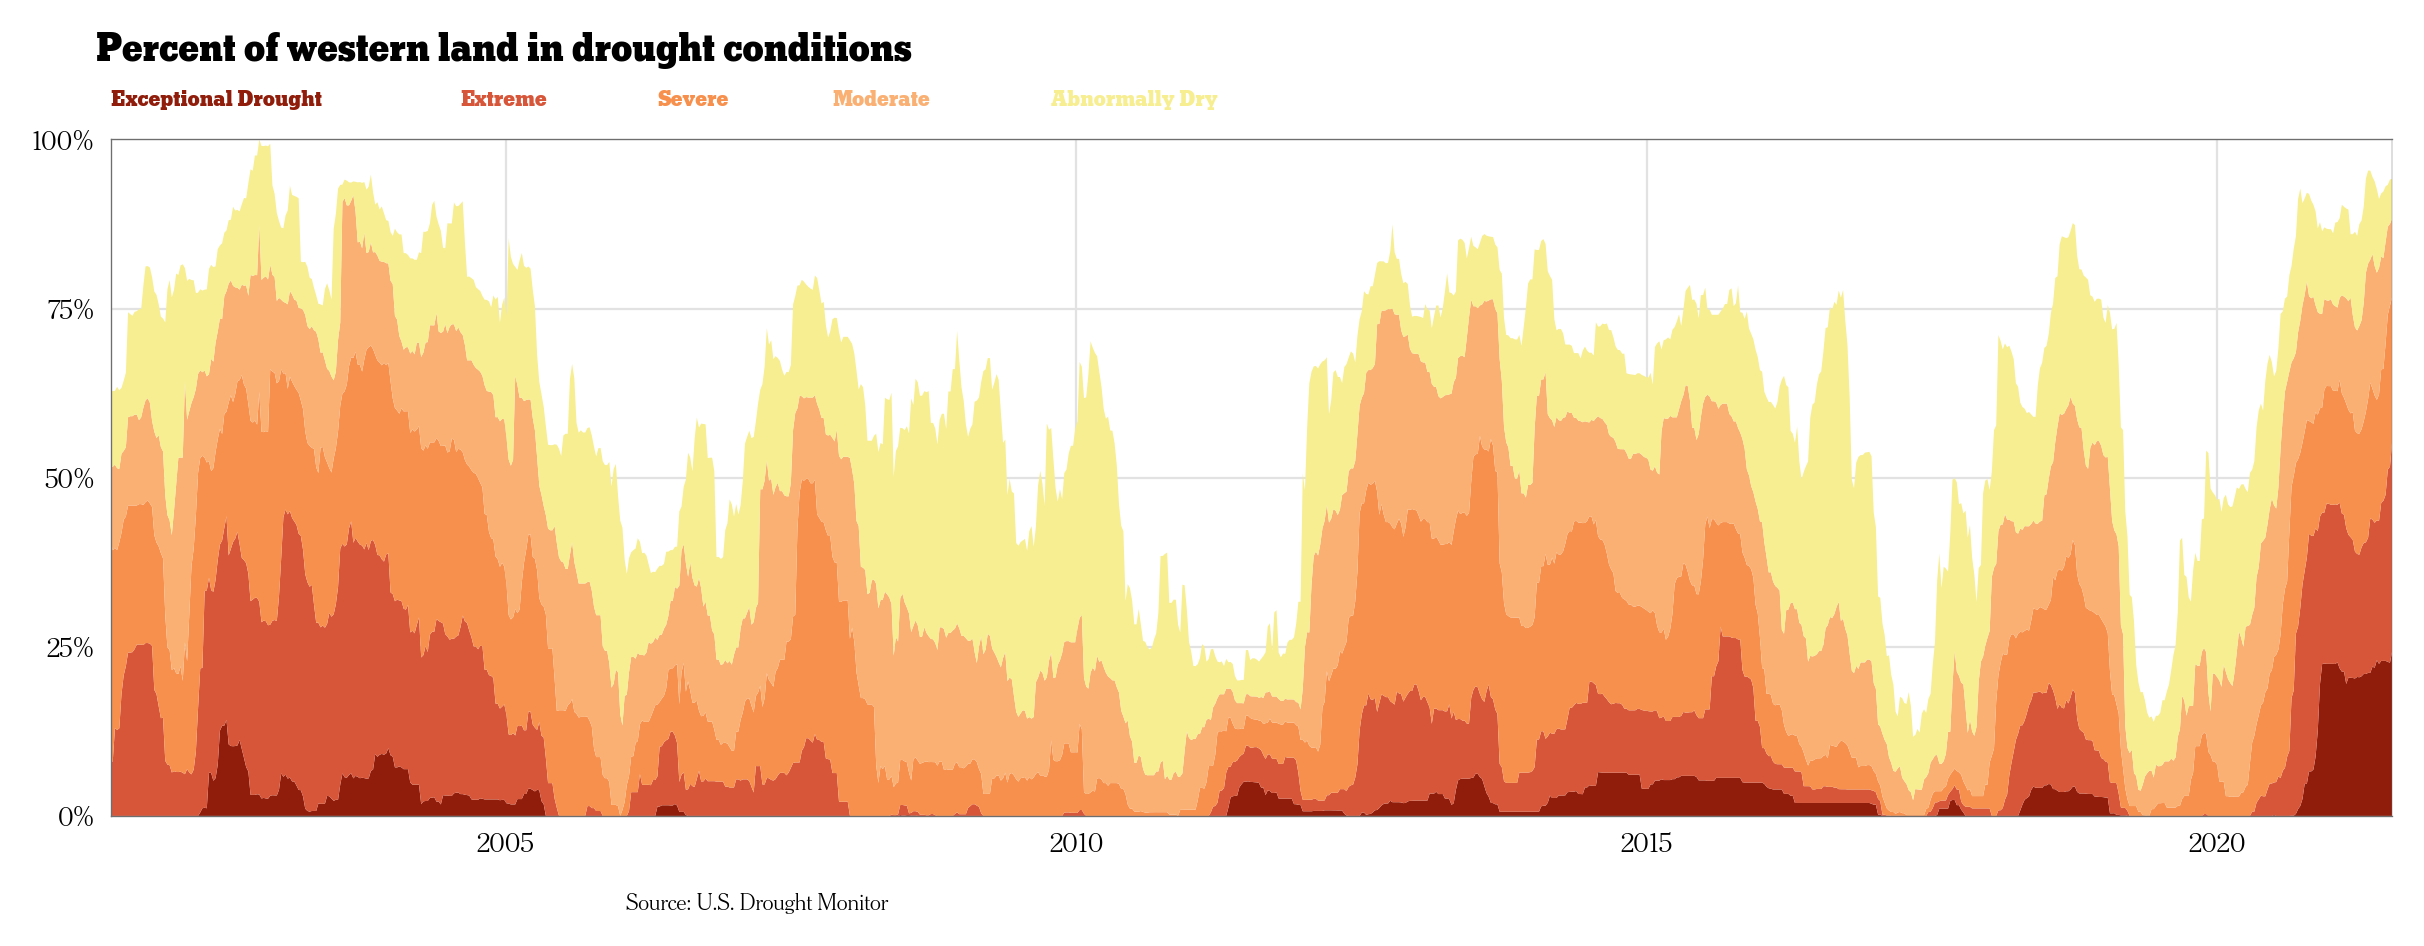

In [ ]:
mpl.rcParams.update({
                     'font.size' : 3,
                     'font.family': 'NYTCheltenham',
                     'figure.facecolor' : 'white',
                     # axes:
                     'axes.facecolor': 'white',
                     'axes.labelsize' : 3,
                     'axes.titlesize' : 2,
                     'axes.xmargin' : 0,
                     'axes.ymargin' : 0,
                     'axes.axisbelow': True, # grid atras del gráfico
                     # tamaño letra de las etiquetas
                     'xtick.labelsize': 6,
                     'ytick.labelsize': 6,
                     'figure.dpi' : 320})

fig, ax = plt.subplots(figsize=(9.2,2.8))
LABELS =['D'+ str(x) for x in range(0,5)]

# Color selccionado por NYC (Un solo extremo: -1 -> 0) y acordes al contexto
color_map = ['#901d0b', '#d7563a', '#f7904d', '#fab073', '#f7ee91']

# --------------------------------------------------------------------------
# Distintas paletas de colores para demostrar antipatterns; se puede
# ignorar esta sección de código y continuar en la línea 43

# Antipattern 1: color map no acorde al contexto que se esta comunicando (e.g. azul para incendios)
# U.S Drought color map azul: 
#color_map = ['#3A12B1', '#192FD3', '#1E63D9', '#2497DE', '#2AD2E4']

# Antipattern 2: color map de extremo a extremo para un rango de 1 solo extremo.
# No vamos de sequía a inundaciones
# U.S Drought wes anderson / Zisshou1 color map de extremo a extremo (-1 a 1)
#color_map = ["#3B9AB2", "#78B7C5", "#EBCC2A", "#E1AF00", "#F21A00"][::-1]

# Antipattern 3: no utilizar colores en gradiente para categorías incrementales/decrementales
# U.S. Drought wes anderson /  color map no como rango 
#color_map = ["#9A8822", "#F5CDB4", "#F8AFA8", "#FDDDA0", "#74A089"][::-1]
# --------------------------------------------------------------------------

# OJO: el argumento colors debe tener una 's' al final, no confundir con color
# edgecolor: 'None' remueve el color del borde, o contorno, de cada área 
ax.stackplot(plt_west.valid_start,
             stacked_lvl[::-1],
             edgecolor='None',
             colors=color_map)

# Agregar etiquetas para identificar cada color correspondiente; el argumento
# annotation_clip=False nos permite salir fuera del rango de las xycoords del
# gráfico
COLOR_LABEL_Y=105

ax.annotate(drought_lvl['D4'], xy=(plt_west.valid_start[0], COLOR_LABEL_Y), 
            color=color_map[0], size=5,
            fontfamily='StymieNYT',
            xycoords='data', annotation_clip=False)

ax.annotate(drought_lvl['D3'], xy=(plt_west.valid_start[160], COLOR_LABEL_Y), 
            color=color_map[1], size=5,
            fontfamily='StymieNYT',
            xycoords='data', annotation_clip=False)


ax.annotate(drought_lvl['D2'], xy=(plt_west.valid_start[250], COLOR_LABEL_Y), 
            color=color_map[2], size=5,
            fontfamily='StymieNYT',
            xycoords='data', annotation_clip=False)


ax.annotate(drought_lvl['D1'], xy=(plt_west.valid_start[330], COLOR_LABEL_Y), 
            color=color_map[3], size=5,
            fontfamily='StymieNYT',
            xycoords='data', annotation_clip=False)


ax.annotate(drought_lvl['D0'], xy=(plt_west.valid_start[430], COLOR_LABEL_Y), 
            color=color_map[4], size=5,
            fontfamily='StymieNYT',
            xycoords='data', annotation_clip=False)

# Mover los tick y etiquetas del eje 'y' a la derecha, 
# cambiar el modo del tick a 'inout' (al medio del eje)
plt.tick_params(axis='both', 
                length=0,
                left=True,
                right=False,
                labelleft=True, 
                labelright=False,
                grid_color='#e2e2e2',
                grid_linewidth=.5)

# [grid] habilitar gridlines eje y
plt.grid(axis='y')
plt.grid(axis='x')

# [y-axis] Formatear axes-y labels con %
ax.yaxis.set_major_formatter(plticker.PercentFormatter())

# Cambiar los valores de los tick
loc = plticker.MultipleLocator(base=25.0)
loc.tick_values(0, 100)
ax.yaxis.set_major_locator(loc)

# Disminuir grosor de la línea contorno en los bordes: superior e inferior y
# derecho e izquierda de los ejes. Además cambiar a un color grisaceo:
ax.spines['top'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['right'].set_linewidth(0.1)
ax.spines['top'].set_color('#6e6e6e')
ax.spines['bottom'].set_color('#6e6e6e')
ax.spines['left'].set_color('#6e6e6e')
ax.spines['right'].set_color('#6e6e6e')


# [x-axis] Modificar ticks y etiquetas el eje x: cada 5 años
#ax.axes.get_xaxis().set_visible(False) 
ax.xaxis.set_major_locator(mpl.dates.YearLocator(5))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

# Agregar título (xy=0,0 esquina inferior izquierda, xy=1,1 esquina superior derecha)
plt.suptitle('Percent of western land in drought conditions',
             x=0.12, y=1.0,
             size=8.8, ha='left',
             fontfamily='StymieNYT')

# Agregar fuente de los datos:
fig.text(0.30, .02, "Source: U.S. Drought Monitor",
         ha='left',
         size=5, style='italic')

# Para guardar la visualización
plt.savefig('us_drought_replica_nyt.png', dpi=320,
            bbox_inches='tight')

Respecto a la lectura del gráfico, recuerda que son áreas "stackeadas" y deben 
entenderse como relativas entre las alturas de las categorias contiguas. 

Observemos el primer y última fecha de registro:

In [ ]:
plt_west.head(n=1)

valid_start   area_pct                                     
drought_lvl                     D0         D1         D2        D3   D4
0            2001-07-17  11.026364  10.946364  32.618182  8.038182  0.0

In [ ]:
plt_west.tail(n=1)

valid_start area_pct                                            
drought_lvl                   D0         D1         D2         D3         D4
1043         2021-07-13     5.88  11.566364  21.345455  31.053636  24.330909

La visualización hace muy buen uso de los colores, se destaca:

1. Los colores tienen relación con el contexto que se 
esta comunicando: `sequía->calor->árido->rojizo`. Adicionalmente, la sequía
es un problema, o una emergencia, por lo tanto el color rojo también tiene 
una significancia con eso (imaginemonos los colores que fueran azul)
1. Los colores se utilizan como rango: de mayor a mediana intensidad. Comunicando que las categorías tienen un orden
1. La visualización no utiliza un color que se pueda interpretar como "bueno/normal". Recordemos que la categoría menos grave es: "Abnormally Dry", por lo 
tanto, los colores no van de un extremo a otro extremo

Dado que estamos reproduciendo una visualización, cómo sabemos exactamente 
los hexcode de los colores utilizados en la lista `color_map`? Sí sabes utilizar algún programa
de edición de imagenes como Photoshop, solamente debes importar un pantallazo
o la imagen y usar la herramienta *eye dropper*. 

Sí eres como yo, y no sabe utilizar Photoshop, puedes usar alguna herramienta online como esta: https://imagecolorpicker.com.

### Aspectos técnicos en la edición

La mayor proporción de líneas de códigos de la visualización
esta relacionado a detalles como formatear los ejes o etiquetas, modificar 
las líneas de la grilla, etcétera.


A continuación un resumen de las ediciones principales:

  1. Cómo eliminar los margenes entre los ejes y el gráfico? Esto se hace
  en la configuración de la visualización al inicio:
  ```python
      mpl.rcParams.update({...,
                          'axes.xmargin' : 0,
                          'axes.ymargin' : 0}
  ```
  1. Cambiar los valores de los ticks del eje y utilizar intervalos regulares de 25 (0-25-50-75...): podemos utilizar el objeto `plticker.MultipleLocator()` para definir intervalos regulares y pasarlo por el método `set_major_locator()` del eje del cual queremos modificar:
  ```python
  import matplotlib.ticker as plticker
  loc = plticker.MultipleLocator(base=25.0)
  ax.yaxis.set_major_locator(loc)
  ```
  1. Formatear las etiquetas a porcentajes (e.g. `25%`):
  ```python
  ax.yaxis.set_major_formatter(plticker.PercentFormatter())
  ```
  1. Cambiar el color y grosor de los bordes del eje utilizando `ax.spines['right/left/top/bottom'].fun()`:
  ```python
  ax.spines['right'].set_linewidth(0.1)
  ax.spines['right'].set_color('#6e6e6e')
  ```
  1. Cambiar la orientación del eje y a la derecha:
  ```python
  plt.tick_params(axis='y', 
                  direction='inout',
                  left=False,
                  right=True,
                  labelleft=False, 
                  labelright=True,
                  grid_color='#c8d4db',
                  grid_linewidth=2
  ```